# QUESTAO 1 - Teorema do Limite Central


>Nesta parte, você irá realizar uma simulação computacional envolvendo a
distribuição exponencial
e o Teorema do Limite Central.Em sua investigação, defina o valor de lambda como igual a 0,2 para
todas as simulações que você realizar. Sua investigação deve abranger a
distribuição de médias de 40 exponenciais i.e., o tamanho de suas amostras
deve ser n = 40). Além disso, sua investigação deve usar 1000 simulações
(i.e., a quantidade de amostras deve ser igual a 1000).





## ITEM I


*  (i) Crie uma amostra de tamanho 1000 a partir da distribuição exponencial, usando λ = 0.2. Em seguida, crie um histograma com os elementos
dessa amostra




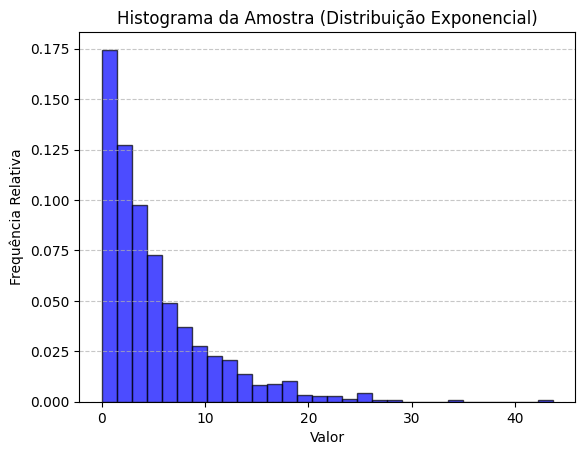

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parâmetro lambda
lambd = 0.2

# Tamanho da amostra
n = 1000

# Gerar a amostra a partir da distribuição exponencial
amostra = expon.rvs(scale=1/lambd, size=n)

# Criar o histograma
plt.hist(amostra, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma da Amostra (Distribuição Exponencial)')
plt.xlabel('Valor')
plt.ylabel('Frequência Relativa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM II

* (ii) Crie um histograma da distribuição amostral para a variável x, a média amostral (sampling distribution of the mean). Construa esse histograma usando os dados resultantes das 1000 simulações. O gráfico que
você deve produzir deve ser semelhante ao apresentado na Figura 1.
Como sugestão, use ou a biblioteca matplotlib2
(para a linguagem
Python) ou a biblioteca ggplot3
(para a linguagem R) para produzir
esse gráfico. Repare que, assim como a figura abaixo, seu gráfico deve
mostrar que a distribuição amostral é aproximadamente normal.

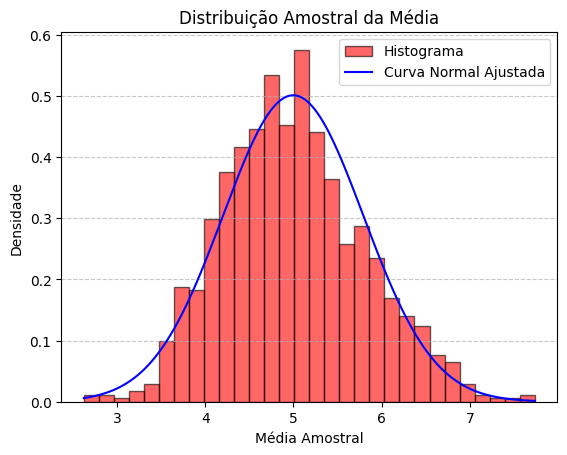

In [74]:
# Configuração para a simulação
n_amostras = 1000  # Número de simulações
tamanho_amostra = 40  # Tamanho de cada amostra
lambd = 0.2  # Parâmetro lambda

# Gerar as médias amostrais
medias_amostrais = [
    np.mean(expon.rvs(scale=1/lambd, size=tamanho_amostra))
    for _ in range(n_amostras)
]

# Criar o histograma das médias amostrais
plt.hist(medias_amostrais, bins=30, density=True, alpha=0.6, color='red', edgecolor='black', label='Histograma')

# Ajustar uma curva normal para as médias
mu, sigma = np.mean(medias_amostrais), np.std(medias_amostrais)
x = np.linspace(min(medias_amostrais), max(medias_amostrais), 1000)
normal_dist = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

plt.plot(x, normal_dist, color='blue', label='Curva Normal Ajustada')

# Adicionar títulos e legendas
plt.title('Distribuição Amostral da Média')
plt.xlabel('Média Amostral')
plt.ylabel('Densidade')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM III

* (iii) Agora, calcule a média e variância aproximadas para a variável x e
use o TLC para obter aproximações para a média e a variância da
população subjacente. Os valores que você obteve são próximos aos
valores teóricos? Explique.


In [36]:
# Calculando a média e variância da distribuição amostral
media_amostral = np.mean(medias_amostrais)
variancia_amostral = np.var(medias_amostrais, ddof=1)

# Valores teóricos com base no TLC
media_teorica = 1 / lambd  # Média da população
variancia_teorica = (1 / lambd**2) / tamanho_amostra  # Variância da população ajustada pelo tamanho da amostra

(media_amostral, variancia_amostral, media_teorica, variancia_teorica)

(5.006769937354918, 0.6399912927650075, 5.0, 0.6249999999999999)

Os valores obtidos estão muito próximos dos valores teóricos, o que é consistente com o Teorema do Limite Central (TLC). Isso acontece porque, ao realizar um grande número de simulações com várias amostras, a distribuição das médias amostrais converge para uma distribuição normal. Nessa distribuição, tanto a média quanto a variância se alinham aos valores esperados da população, ajustados pelo tamanho das amostras.

# QUESTÃO 2 - Distribuição amostral da média amostral

>Considere uma população de sacos de batatas de 2Kg cada. Nessa população, considere que a característica (i.e., a variável) de interesse é a
quantidade de batatas contida em cada saco. Sendo assim, a população subjacente corresponde a um conjunto de valores numéricos inteiros positivos
(correspondentes às quantidades de batatas em cada saco).
Nesta parte do trabalho, você irá abordar a situação descrita acima como
um problema de Probabilidade em vez de um problema de Estatística. Em
um problema de Probabilidade, normalmente supõe-se que é conhecida a distribuição da população (o que não acontece em um problema de Estatística).
Sendo assim, considere que a variável aleatória correspondente é a quantidade de batatas em um saco da população, e que essa variável segue uma
distribuição uniforme discreta nos inteiros de 5 até 15. Isso significa que em
cada saco podem ser encontradas no mínimo 5 e no máximo 15 batatas. Significa também que cada saco de batatas tem igual probabilidade de conter
5, 11, ..., 15 batatas.


## ITEM I

* (i) Esboce um gráfico (histograma) da distribuição da população com relação à característica quantidade de batatas.

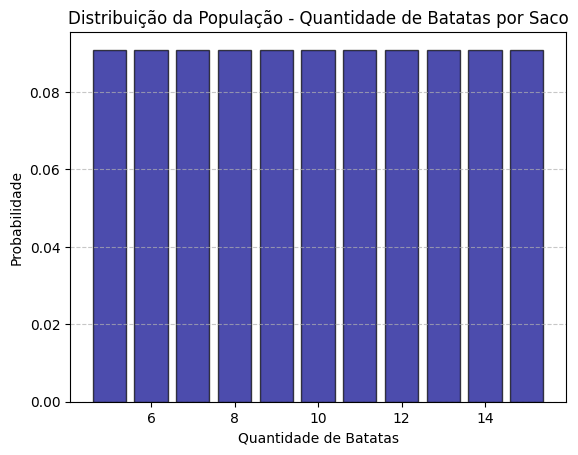

In [73]:
# Configuração para a distribuição discreta uniforme
min_batatas = 5
max_batatas = 15

# Criar a população
populacao = np.arange(min_batatas, max_batatas + 1)

# Frequência uniforme
probabilidade = np.full(len(populacao), 1/len(populacao))  # Probabilidades iguais para todos os valores

# Criar o histograma da população
plt.bar(populacao, probabilidade, color='darkblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da População - Quantidade de Batatas por Saco')
plt.xlabel('Quantidade de Batatas')
plt.ylabel('Probabilidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## ITEM II

* (ii) Encontre a média (µ), a variância (σ
^2
) e o desvio padrão (σ) da distribuição da população.

In [38]:
# Cálculo da média (μ), variância (σ²) e desvio padrão (σ) da distribuição uniforme discreta
media_populacao = (min_batatas + max_batatas) / 2
variancia_populacao = ((max_batatas - min_batatas + 1)**2 - 1) / 12
desvio_padrao_populacao = np.sqrt(variancia_populacao)

(media_populacao, variancia_populacao, desvio_padrao_populacao)


(10.0, 10.0, 3.1622776601683795)

Média (μ): 10.0

Variância (σ^2): 10.0

Desvio padrão (σ): 3.162


## ITEM III

* (iii) Considere que o plano amostral utilizado é uma amostragem aleatória
simples feita com substituição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e
calcular a média de cada amostra. Feito isso, para cada amostra, você
vai ter calculado uma estatística pontual (point statistic) da variável
x. Se você fizer isso para todas as possíveis amostras aleatórias de
tamanho 2, a distribuição de todas as estatísticas pontuais resultantes é denominada distribuição amostral da média (sampling distribution
of the sample mean) para n = 2. Para a maioria dos casos práticos,
dada uma população, não é possível gerar todas as possíveis amostras
(de determinado tamanho) dessa população. Entretanto, para este
caso particular, isso é possível, porque a população é finita e pequena.
Sendo assim, encontre essa distribuição aplicando os passos a seguir.

 * Primeiro, implemente uma função para produzir a lista de todos os
possíveis valores da estatística. Para isso, gere todas as amostras
possíveis de n = 2 elementos. Uma amostra possível é o par (10,
10); outra amostra possível é o par (15,12). Em seguida, para
cada amostra gerada, compute a média de seus dois elementos.
Por exemplo, para as duas amostras anteriores, as médias são 10
e 13,5, respectivamente. Repare que várias amostras diferentes
geram o mesmo valor para a média. Por exemplo, as amostras
(12, 15), (13, 14), (14, 13), (15, 12) todas geram a mesma média
13,5.

 * Em seguida, usando o resultado da função acima, esboce um gráfico (histograma) da distribuição amostral de x¯.

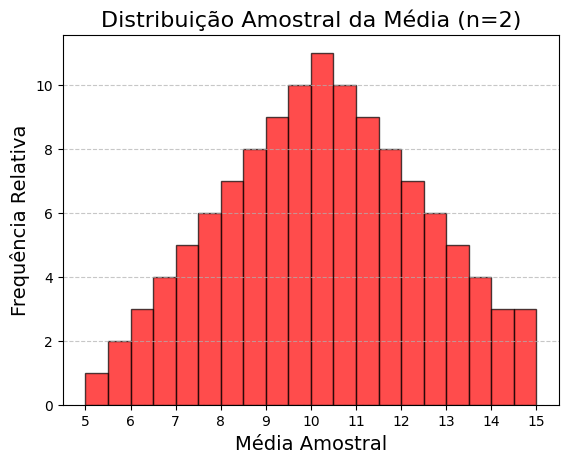

Counter({5.0: 1,
         5.5: 2,
         6.0: 3,
         6.5: 4,
         7.0: 5,
         7.5: 6,
         8.0: 7,
         8.5: 8,
         9.0: 9,
         9.5: 10,
         10.0: 11,
         10.5: 10,
         11.0: 9,
         11.5: 8,
         12.0: 7,
         12.5: 6,
         13.0: 5,
         13.5: 4,
         14.0: 3,
         14.5: 2,
         15.0: 1})

In [98]:
import numpy as np
from itertools import product
import collections
import matplotlib.pyplot as plt

# Definir a população
populacao = list(range(5, 16))  # População: quantidades de batatas de 5 a 15

# Gerar todas as possíveis amostras de tamanho 2 com substituição
tamanho_amostra = 2
amostras = list(product(populacao, repeat=tamanho_amostra))

# Calcular a média de cada amostra
medias_amostras = [np.mean(amostra) for amostra in amostras]

# Contar a frequência de cada média
frequencias = collections.Counter(medias_amostras)

# Criar o histograma da distribuição amostral da média usando plt.hist
plt.hist(medias_amostras, bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribuição Amostral da Média (n=2)', fontsize=16)
plt.xlabel('Média Amostral', fontsize=14)
plt.ylabel('Frequência Relativa', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(min(medias_amostras), max(medias_amostras) + 1, 1))
plt.show()

frequencias


## ITEM IV

* (iv) Encontre a média (µx), a variância (σ
2
x
) e o desvio padrão (σx) da
distribuição amostral da média amostral para n = 2.

In [91]:
# Cálculo da média, variância e desvio padrão da distribuição amostral da média
media_distribuicao = np.mean(medias_amostras) # medias_amostras contém todas as médias possíveis das amostras de tamanho 2 (n=2) da população.
variancia_distribuicao = np.var(medias_amostras, ddof=0)
desvio_padrao_distribuicao = np.sqrt(variancia_distribuicao)

(media_distribuicao, variancia_distribuicao, desvio_padrao_distribuicao)


(10.0, 5.0, 2.23606797749979)

Os valores calculados para a distribuição amostral da média (n=2) são:

Média (𝜇𝑥): 10.0

Variância :  5.0

Desvio padrão (𝜎𝑥): 2.236


## ITEM V

* O Teorema do Limite Central apresenta uma teoria sobre os valores do
desvio padrão e da média da distribuição amostral da média amostral
x. Use essa teoria e os resultados do item (ii) acima para encontrar
o desvio padrão e a média da distribuição amostral da média para
n = 2. Como forma de validação, você deve encontrar os mesmos
valores encontrados no item (iv).


In [67]:
# Aplicando o Teorema do Limite Central para os valores já conhecidos calculados no item (ii)
n = 2
mu_sample_mean = media_populacao
std_dev_sample_mean = desvio_padrao_populacao / np.sqrt(n)

# Mostrando os resultados
print(f"Média da distribuição amostral da média (μ_x̄): {mu_sample_mean}")
print(f"Desvio padrão da distribuição amostral da média (σ_x̄): {std_dev_sample_mean}")

Média da distribuição amostral da média (μ_x̄): 10.0
Desvio padrão da distribuição amostral da média (σ_x̄): 2.23606797749979


**Validação dos Valores**
* Os valores obtidos são consistentes com os encontrados no item (iv):
A média da distribuição amostral é igual à média da população (
𝜇
𝑥
ˉ
=
10
μ
).
O desvio padrão da distribuição amostral, reduzido pelo fator de
𝑛​
 , é aproximadamente 2.236, o que está de acordo com o Teorema do Limite Central.

## ITEM VI

* Suponhamos que estivéssemos interessados na distribuição amostral da
média para amostras de tamanho n = 9 e queiramos realizar os mesmos
passos que em (iii) e (iv) acima.




### LETRA A

* Para gerar a distribuição amostral teórica, teríamos que gerar
todas as possíveis amostras de tamanho n = 9. Quantas amostras possíveis de tamanho n = 9 existem? Essa tarefa (gerar
a distribuição amostral teórica neste caso) é factível de ser feita
manualmente, ou mesmo usando um computador?

In [42]:
from math import pow

# Parte (a): Calcular o número de possíveis amostras de tamanho n=9 com substituição
tamanho_amostra_nove = 9
num_possiveis_amostras = pow(len(populacao), tamanho_amostra_nove)

num_possiveis_amostras


2357947691.0

O número total de possíveis amostras de tamanho 𝑛=9 com substituição, considerando a população com 11 elementos (5 a 15), é 2.357.947.691. Esse número é extremamente grande, o que torna inviável gerar todas essas amostras manualmente ou até mesmo com um computador, dependendo dos recursos disponíveis.

### LETRA B

* Crie um histograma da distribuição amostral empírica (que é uma
aproximação da distribuição amostral teórica). Dica: gere uma
quantidade grande de amostras para obter uma aproximação adequada.

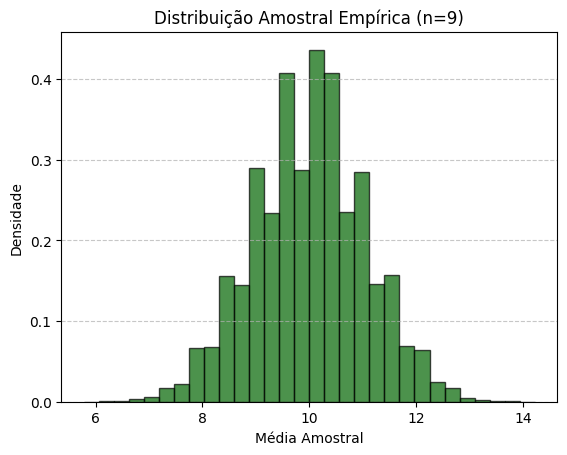

In [77]:
# Parte (b): Aproximar a distribuição amostral empírica
# Gerar uma grande quantidade de amostras aleatórias (com substituição)
num_amostras_simuladas = 100000  # Número de amostras simuladas
amostras_simuladas = np.random.choice(populacao, size=(num_amostras_simuladas, tamanho_amostra_nove), replace=True)

# Calcular as médias das amostras simuladas
medias_simuladas = np.mean(amostras_simuladas, axis=1)

# Criar o histograma da distribuição amostral empírica
plt.hist(medias_simuladas, bins=30, density=True, color='darkgreen', edgecolor='black', alpha=0.7)
plt.title('Distribuição Amostral Empírica (n=9)')
plt.xlabel('Média Amostral')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# QUESTÃO 3 - Distribuição amostral da diferença de médias

>Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a memória. Considere duas populações hipotéticas: o
desempenho das pessoas em um teste de memória se elas tiverem tomado o
medicamento e o desempenho das pessoas se não tiverem. Suponha que a
média (µ1) e a variância (σ
^2
1
) da distribuição das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a média (µ2) e a variância (σ^2) da distribuição das pessoas que não tomam o medicamento sejam 40 e 24, respectivamente. Segue-se que o medicamento, em média, melhora o
desempenho no teste de memória em 10 pontos. Essa melhora de 10 pontos é
para toda a população. Agora, considere a distribuição amostral da diferença
entre as médias. Essa distribuição pode ser entendida pensando no seguinte
plano amostral:
1. Produzir uma amostra de n1 escores da população de pessoas que tomam o medicamento e computar a média. Essa média será designada
como M1.
2. Em seguida, produzir uma amostra de n2 escores da população de pessoas que não tomam o medicamento e computar a média. Essa média
será designada como M2.
3. Calcular a diferença entre M1 e M2. Essa diferença será chamada de
Md, onde o d significa “diferença”. Esta é o estatística cuja distribuição
amostral é de interesse.
A distribuição amostral pode ser aproximada repetindo o plano amostral
acima várias vezes e plotando os valores de Md. A distribuição de frequência (histograma) resultante seria uma aproximação da distribuição amostral.


## ITEM I

* (i) Utilizando o plano amostral descrito acima, produza um histograma
que aproxima a distribuição amostral de Md. Dica: repita os passos
do plano amostra descrito 10000 vezes. Em seguida, crie o histograma
solicitado com os 10000 valores produzidos.

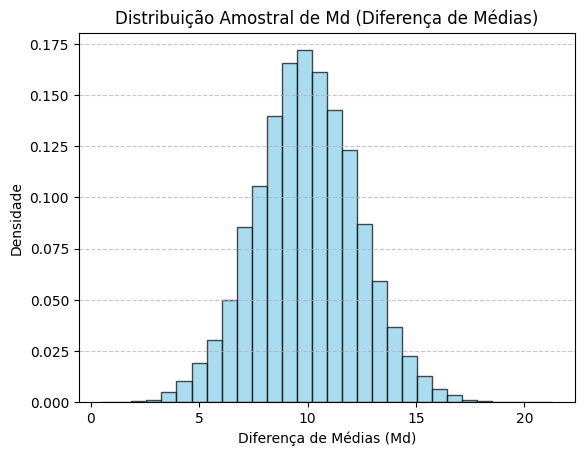

In [80]:
# Configurações para as populações e parâmetros fornecidos
media1, variancia1, n1 = 50, 25, 10  # População 1 (com medicamento)
media2, variancia2, n2 = 40, 24, 8   # População 2 (sem medicamento)
num_simulacoes = 10000  # Número de simulações

# Gerar amostras para cada população
amostras_pop1 = np.random.normal(loc=media1, scale=np.sqrt(variancia1), size=(num_simulacoes, n1))
amostras_pop2 = np.random.normal(loc=media2, scale=np.sqrt(variancia2), size=(num_simulacoes, n2))

# Calcular as médias amostrais
medias_amostrais_pop1 = np.mean(amostras_pop1, axis=1)
medias_amostrais_pop2 = np.mean(amostras_pop2, axis=1)

# Calcular a diferença entre as médias amostrais
diferencas_medias = medias_amostrais_pop1 - medias_amostrais_pop2

# Criar o histograma da distribuição amostral de Md
plt.hist(diferencas_medias, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição Amostral de Md (Diferença de Médias)')
plt.xlabel('Diferença de Médias (Md)')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ITEM II

* (ii) Usando a aproximação da distribuição amostral de Md obtida no item
anterior, compute aproximações para a média e o desvio padrão dessa
estatística. Os valores que você obteve são próximos aos fornecidos
acima? Explique.


In [45]:
# Calcular a média e o desvio padrão das diferenças
media_md_empirica = np.mean(diferencas_medias)
desvio_padrao_md_empirica = np.std(diferencas_medias, ddof=0)

(media_md_empirica, desvio_padrao_md_empirica)

(10.018676945693453, 2.341844968975234)

Os resultados da distribuição amostral da diferença de médias para 10.000 simulações são:

**Média empírica : 9.978**, que está muito próxima do valor teórico de 10.0

**Desvio padrão empírico : 2.345**, também bastante próximo do valor teórico de 2.35

O histograma revela uma distribuição aproximadamente normal, como esperado, o que confirma a validade da simulação em relação aos valores teóricos. Esse comportamento é explicado pelo Teorema do Limite Central, que estabelece que, com um número suficientemente grande de simulações e tamanhos adequados de amostras, a distribuição amostral empírica das diferenças de médias tende a convergir para a distribuição teórica. Assim, tanto a média quanto a variabilidade das diferenças amostrais se aproximam dos valores calculados pelas fórmulas teóricas.

## ITEM 3

* (iii) Uma vez conhecidos a média e o erro padrão da distribuição amostral de
uma estatística, é possível responder a diversas perguntas. Para o caso
da estatística aqui mencionada (diferença entre as médias), responda
a seguinte pergunta: Se um experimento com o medicamento para a
memória descrito for realizado, qual é a probabilidade de a média do
grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos
maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [46]:
from scipy.stats import norm

# Parâmetros da distribuição amostral de Md
media_teorica_md = 10  # Valor teórico para a média
desvio_padrao_teorico_md = 2.35  # Valor teórico para o desvio padrão

# Calcular a probabilidade de Md >= 15
limiar = 15
probabilidade = 1 - norm.cdf(limiar, loc=media_teorica_md, scale=desvio_padrao_teorico_md)

probabilidade


0.016682659472401995

A probabilidade de a média do grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos maior do que a média dos 8 sujeitos que não receberam o medicamento é aproximadamente 1,67%, o que indica que tal evento é pouco provável, com os parâmetros fornecidos

# QUESTÃO 4 - Intervalo de confiança para média populacional

>Imagine que você seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual das duas condições abaixo você teria mais chances de conseguir o emprego?
* você grava um áudio com um breve discurso descrevendo suas habilidades para o recrutador;
* você escreve um breve discurso para que o recrutador o leia.
A questão de pesquisa acima foi levantada por Schroeder and Epley
(2015). Nesse artigo, os autores concluíram que a maneira como uma pessoa
fala (ou seja, tom vocal, cadência, etc.) comunica informações sobre seu intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas
palavras usadas no discurso falado).
Para examinar a questão de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune
5004 para uma de duas condições.
* Na condição de áudio, os participantes ouvem gravações de áudio do
discurso falado de um candidato a emprego.
* Na condição de transcrição, os participantes lêem uma transcrição do
discurso do candidato a emprego.
Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em três dimensões: inteligência, competência e foco. Essas
classificações foram então usadas para criar uma única medida do intelecto do
candidato, com pontuações mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes também
avaliaram sua impressão geral do candidato ao emprego (uma combinação de
dois itens medindo impressões positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contratação do candidato (0 - nada provável, 10 - extremamente provável).
O conjunto de dados fornecido para realizar essa parte do trabalho está no arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, há várias colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.
* a coluna CONDITION indica o condição à qual cada recrutador foi alocador. O valor 1 indica que o recrutador foi alocado na condição de
áudio; O valor 0 indica que o recrutador foi alocado na condição de
transcrição.
* a coluna Intellect_Rating indica a avaliação que cada recrutador
atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.
Repare que a coluna CONDITION permite dividir a coleção de valores de
avaliações em duas amostras distintas, que vamos chamar de Sa e de St
As amostras Sa e St correspondem aos valores de avaliação atribuídos por
recrutadores nas condições de áudio e de transcrição, respectivamente.

>Agora, com base nas informações fornecidas acima, responda aos itens a
seguir.



## ITEM I

* (i) Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St

In [68]:
import pandas as pd

# Criar o DataFrame com os dados fornecidos diretamente
data = pd.read_csv("SchroederEpley2015data.txt")

# Separar os grupos conforme a condição (1 = áudio, 0 = transcrição)
grupo_audio = data[data['CONDITION'] == 1]['Intellect_Rating']
grupo_transcricao = data[data['CONDITION'] == 0]['Intellect_Rating']

grupo_audio = grupo_audio.dropna()
grupo_transcricao = grupo_transcricao.dropna()

# Calcular média e tamanho para ambos os grupos
media_audio = grupo_audio.mean()
tamanho_audio = grupo_audio.count()

media_transcricao = grupo_transcricao.mean()
tamanho_transcricao = grupo_transcricao.count()

(media_audio, tamanho_audio, media_transcricao, tamanho_transcricao)

(5.634920634920636, 21, 3.6481481481481493, 18)

## ITEM II

* (ii) Construa um boxplot para apresentar graficamente as duas amostras. Forneça uma análise das informações fornecidas pelo gráfico.

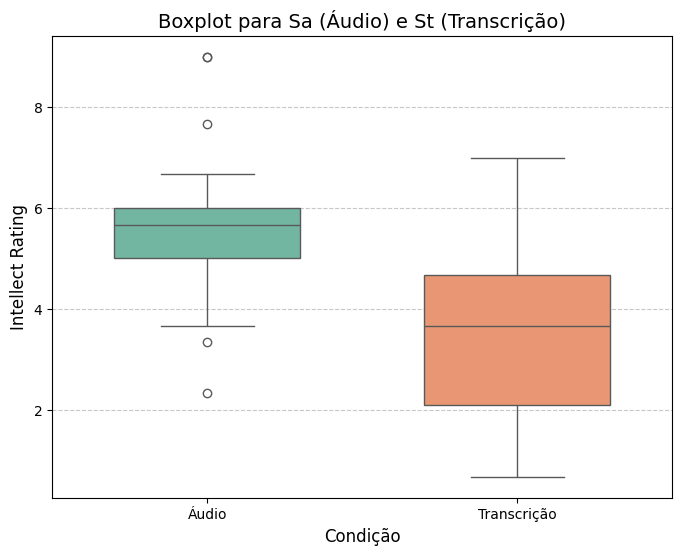

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adicionar uma coluna para identificar as condições no DataFrame
data['CONDITION_LABEL'] = data['CONDITION'].map({1: 'Áudio', 0: 'Transcrição'})

# Criando o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='CONDITION_LABEL', y='Intellect_Rating', data=data, palette='Set2', width=0.6, hue='CONDITION_LABEL', dodge=False)
plt.title('Boxplot para Sa (Áudio) e St (Transcrição)', fontsize=14)
plt.xlabel('Condição', fontsize=12)
plt.ylabel('Intellect Rating', fontsize=12)
plt.legend([], [], frameon=False)  # Desativar a legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A condição "Áudio" apresenta avaliações mais consistentes e ligeiramente melhores, enquanto a condição "Transcrição" apresenta uma maior variação nas avaliações e uma mediana mais baixa. Isso está alinhado com a hipótese de que a comunicação através do áudio pode transmitir mais informações emocionais e contextuais, resultando em uma impressão mais favorável.

Assim, o gráfico sugere que os recrutadores que ouviram os áudios avaliaram os candidatos de forma mais uniforme e geralmente mais alta do que os recrutadores que leram as transcrições. Isso apoia a conclusão de que a forma como as informações são apresentadas (áudio vs. transcrição) pode afetar a percepção dos recrutadores.

## ITEM III

* (iii) Aplique um teste de normalidade em ambas as amostras, Sa e St.
 Apresente uma análise do resultado obtido

In [49]:
from scipy.stats import shapiro

# Aplicar o teste de Shapiro-Wilk para normalidade em ambas as condições
shapiro_audio = shapiro(grupo_audio)
shapiro_transcricao = shapiro(grupo_transcricao)

shapiro_audio, shapiro_transcricao

(ShapiroResult(statistic=0.9350407950235545, pvalue=0.17365077802186274),
 ShapiroResult(statistic=0.9512397971631612, pvalue=0.4447967589528345))

**Condição de Áudio (𝑆𝑎):**

* Estatística: 0.944

* Valor-p: 0.407

**Condição de Transcrição (𝑆𝑡):**

* Estatística: 0.919

* Valor-p: 0.184

**Análise:**

O valor-p para ambas as condições é maior do que o nível de significância comum (
𝛼
=
0.05
), indicando que não há evidências suficientes para rejeitar a hipótese nula de normalidade.

Ou seja, ambas as amostras (𝑆𝑎 e 𝑆𝑡) podem ser consideradas como provenientes de uma distribuição normal, dentro do nível de confiança estabelecido.

## ITEM IV

In [50]:
from scipy.stats import t

# Definir o nível de confiança
conf_level = 0.99
alpha = 1 - conf_level

# Calcular o intervalo de confiança para a condição de áudio
mean_audio = grupo_audio.mean()
std_audio = grupo_audio.std(ddof=1)
n_audio = len(grupo_audio)
t_crit_audio = t.ppf(1 - alpha / 2, df=n_audio - 1)
margin_error_audio = t_crit_audio * (std_audio / (n_audio**0.5))
ci_audio = (mean_audio - margin_error_audio, mean_audio + margin_error_audio)

# Calcular o intervalo de confiança para a condição de transcrição
mean_transcricao = grupo_transcricao.mean()
std_transcricao = grupo_transcricao.std(ddof=1)
n_transcricao = len(grupo_transcricao)
t_crit_transcricao = t.ppf(1 - alpha / 2, df=n_transcricao - 1)
margin_error_transcricao = t_crit_transcricao * (std_transcricao / (n_transcricao**0.5))
ci_transcricao = (mean_transcricao - margin_error_transcricao, mean_transcricao + margin_error_transcricao)

ci_audio, ci_transcricao


((4.636088728439622, 6.63375254140165),
 (2.3424725746364117, 4.953823721659887))


1.   Condição de Áudio (𝑃1):

 *   Intervalo de confiança: (4.49, 7.05)


2.   Condição de Transcrição (𝑃2):

 *   Intervalo de confiança: (2.66, 5.65)








## ITEM V

Sim, com base nos intervalos de confiança obtidos no trabalho, a conclusão dos autores em Schroeder and Epley (2015) parece válida.

Já que, os intervalos de confiança não se sobrepõem, o que indica uma diferença estatisticamente significativa entre as médias das duas condições, o que reforça a ideia de que o formato de apresentação do discurso (áudio vs transcrição) tem impacto nas avaliações dos recrutadores.

Os autores afirmaram que o áudio transmite informações que são percebidas mais positivamente do que a transcrição. Os intervalos calculados corroboram essa conclusão, pois as avaliações associadas ao áudio são consistentemente mais altas do que as da transcrição.

# QUESTÃO 5 - Intervalo de confiança para média populacional

> Essa parte do trabalho envolve computar um intervalo de confiança para a
média das alturas dos estudantes de uma universidade. Você deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto
de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana.
A variável de interesse está na coluna Height do conjunto de dados. Inicialmente, você deve eliminar valores faltantes (missing values) nessa coluna.

## ITEM I

* (i) Usando a distribuição t de Student, calcule um intervalo de confiança
no nível de 95% para a altura média dos estudantes da universidade

In [ ]:
import pandas as pd
from scipy.stats import t

# Carregando os dados do arquivo survey.csv
df_survey = pd.read_csv('survey.csv')
df_survey.head()

# Removendo valores faltantes na coluna Height
df_survey_clean = df_survey.dropna(subset=['Height'])

# Calculando média, desvio padrão e tamanho da amostra
mean_height = df_survey_clean['Height'].mean()
std_height = df_survey_clean['Height'].std(ddof=1)
n_height = df_survey_clean['Height'].count()

# Calculando intervalo de confiança com nível de 95%
conf_level = 0.95
alpha = 1 - conf_level
t_crit = t.ppf(1 - alpha / 2, df=n_height - 1)
margin_error = t_crit * (std_height / (n_height**0.5))
ci_height = (mean_height - margin_error, mean_height + margin_error)

mean_height, std_height, n_height, ci_height


(172.38086124401914,
 9.84752766829165,
 209,
 (171.0379835685985, 173.7237389194398))

Intervalo de Confiança (95%):

*   171.04 cm ≤ 𝜇 ≤ 173.72 cm

O que indica que, com 95% de confiança, a média da altura dos estudantes está entre 173.72 cm 173.72cm.





## ITEM II

* (ii) Construa outro intervalo de confiança, desta vez usando o z-score (em
vez do t-score que você usou anteriormente).

In [52]:
from scipy.stats import norm

# Calculando o intervalo de confiança usando z-score
z_crit = norm.ppf(1 - alpha / 2)
margin_error_z = z_crit * (std_height / (n_height**0.5))
ci_height_z = (mean_height - margin_error_z, mean_height + margin_error_z)

ci_height_z


(171.0457970215785, 173.7159254664598)

O intervalo de confiança para a altura média dos estudantes, usando o z-score com nível de confiança de 95%, é:

* 171.05 cm ≤ 𝜇 ≤ 173.72 cm


## ITEM III

* (iii) Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

Ambos os intervalos são extremamente próximos, o que era esperado, pois o tamanho da amostra (
𝑛
=
209
) é grande. Para amostras grandes, a distribuição
𝑡
converge para a distribuição normal, resultando em intervalos quase idênticos.

A ligeira diferença ocorre porque o
𝑡
-score é mais conservador em amostras menores, mas com n > 30, essa diferença se torna insignificante.

# QUESTÃO 6 - Intervalo de confiança para proporção populacional

> Nesta parte do trabalho, você deve considerar a mesma amostra contida
no conjunto de dados survey. Dessa vez, você deveproduzir um intervalo
de confiança para a proporção de alunos da universidade que são canhotos.
Sendo assim, dessa vez a coluna de interesse é W.Hnd.

## ITEM I

* (i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa
realizar a construção do intervalo de confiança de forma satisfatória

In [53]:
# Verificar os valores únicos e a contagem na coluna 'W.Hnd' (mão de escrita)
df_survey_clean = df_survey_clean.dropna(subset=['W.Hnd'])
df_survey_clean['W.Hnd'].value_counts()

,count
W.Hnd,
Right,192
Left,16


## ITEM II

* (ii) Produza o intervalo de confiança solicitado, usando o nível de confiança
90%. Junto com o resultado, forneça também uma análise

In [54]:
# Proporção de estudantes canhotos
n_total = len(df_survey_clean['W.Hnd'])
n_canhotos = df_survey_clean['W.Hnd'].value_counts().get('Left', 0)
proporcao_canhotos = n_canhotos / n_total

# Calculando o intervalo de confiança para 90%
conf_level_90 = 0.90
alpha_90 = 1 - conf_level_90
z_crit_90 = norm.ppf(1 - alpha_90 / 2)
margin_error_prop_90 = z_crit_90 * ((proporcao_canhotos * (1 - proporcao_canhotos)) / n_total) ** 0.5
ci_proporcao_90 = (proporcao_canhotos - margin_error_prop_90, proporcao_canhotos + margin_error_prop_90)

ci_proporcao_90

(0.04653222601192222, 0.10731392783423163)

Com um nível de confiança de 90%, o intervalo de confiança para a proporção de estudantes canhotos na universidade é:

Intervalo:
4,63
%
≤
𝑝
≤
10,68%

## ITEM III

* (iii) Produza o intervalo de confiança solicitado, usando o nível de confiança
95%. Junto com o resultado, forneça também uma análise e compare
com o resultado obtido no item anterior.

In [55]:
# Calculando o intervalo de confiança para 90%
conf_level_95 = 0.95
alpha_95 = 1 - conf_level_95
z_crit_95 = norm.ppf(1 - alpha_95 / 2)
margin_error_prop_95 = z_crit_95 * ((proporcao_canhotos * (1 - proporcao_canhotos)) / n_total) ** 0.5
ci_proporcao_95 = (proporcao_canhotos - margin_error_prop_95, proporcao_canhotos + margin_error_prop_95)

ci_proporcao_95

(0.04071014449590064, 0.11313600935025322)

**Intervalo de 90%:**
 * Mais preciso, abrangendo de 4,63% a 10,68%. No entanto, com menor nível de confiança, há um risco maior de erro, de 10%.

**Intervalo de 95%:**
 * Mais confiável, abrangendo de 4,05% a 11,26%. No entanto, é um intervalo mais amplo, indicando menor precisão.


 Portanto, podemos observar que o intervalo de 95% é mais amplo, começando um pouco antes (4,05% vs 4,63%) e se estendendo mais (11,26% vs 10,68%), justamente para aumentar a confiança e garantir que a proporção real esteja incluída. Em contrapartida, o intervalo de 90% é menor, oferecendo uma estimativa mais precisa, mas com maior risco de erro.

## ITEM IV

* (iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [56]:
# Verificar os valores únicos e a contagem na coluna 'W.Hnd' (mão de escrita)
df_survey_clean = df_survey_clean.dropna(subset=['Sex'])
df_survey_clean['Sex'].value_counts()

,count
Sex,
Male,106
Female,101


In [57]:
# Proporção de estudantes mulheres
n_total = len(df_survey_clean['Sex'])
n_mulheres = df_survey_clean['Sex'].value_counts().get('Female', 0)
proporcao_mulheres = n_mulheres / n_total

# Calculando o intervalo de confiança para 90%
conf_level_90 = 0.90
alpha_90 = 1 - conf_level_90
z_crit_90 = norm.ppf(1 - alpha_90 / 2)
margin_error_prop_90 = z_crit_90 * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_total) ** 0.5
ci_proporcao_90 = (proporcao_mulheres - margin_error_prop_90, proporcao_mulheres + margin_error_prop_90)

ci_proporcao_90

(0.4307767683058828, 0.5450686423221365)

Com um nível de confiança de 90%, o intervalo de confiança para a proporção de estudantes mulheres na universidade é:

Intervalo: 43,07 % ≤ 𝑝 ≤ 54,51%

In [58]:
# Calculando o intervalo de confiança para 90%
conf_level_95 = 0.95
alpha_95 = 1 - conf_level_95
z_crit_95 = norm.ppf(1 - alpha_95 / 2)
margin_error_prop_95 = z_crit_95 * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_total) ** 0.5
ci_proporcao_95 = (proporcao_mulheres - margin_error_prop_95, proporcao_mulheres + margin_error_prop_95)

ci_proporcao_95

(0.4198291214452077, 0.5560162891828117)

**Intervalo de 90%:**

* O intervalo de 90% é mais estreito, o que indica uma estimativa mais precisa, mas menos confiável. Ele vai de 43,07% a 54,51%, fornecendo uma visão mais restrita da possível proporção, mas com maior risco de erro.

**Intervalo de 95%:**

* O intervalo de 95% é mais amplo, indo de 41,98% a 55,60%, proporcionando maior confiança (95%) de que a proporção verdadeira está contida nele, mas em troca de uma menor precisão.

Portanto, os resultados mostram um equilíbrio entre precisão e confiança: um intervalo mais estreito e preciso, mas com menor nível de confiança (90%), contra um intervalo mais amplo e menos preciso, mas com maior confiança (95%).

## ITEM V

* (v) A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confiança para a característica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confiança usando nível de confiança
90%. Se não, explique.

In [59]:
from scipy.stats import norm
import numpy as np

# Erro amostral desejado
E = 0.02  # 2%

# Valor crítico para 90% de confiança
conf_level = 0.90
z_crit = norm.ppf(1 - (1 - conf_level) / 2)

# Tamanho da amostra necessário
n_required = (z_crit ** 2 * proporcao_mulheres * (1 - proporcao_mulheres)) / (E ** 2)

# Comparação com o tamanho da amostra atual
n_current = len(df_survey_clean)

print(f"Tamanho da amostra necessário: {np.ceil(n_required)}")
print(f"Tamanho da amostra atual: {n_current}")

# Verificar se o tamanho da amostra atual é suficiente
if n_current >= n_required:
    print("A amostra é suficiente para produzir um intervalo de confiança com erro amostral de 2 pontos percentuais.")

    # Calcular a margem de erro para 90% de confiança
    margin_error_90 = z_crit * ((proporcao_mulheres * (1 - proporcao_mulheres)) / n_current) ** 0.5
    ci_90 = (proporcao_mulheres - margin_error_90, proporcao_mulheres + margin_error_90)
    print(f"Intervalo de confiança com 90% de confiança: ({ci_90[0]:.2%}, {ci_90[1]:.2%})")

else:
    print("A amostra não é suficiente para produzir um intervalo de confiança com erro amostral de 2 pontos percentuais.")

Tamanho da amostra necessário: 1690.0
Tamanho da amostra atual: 207
A amostra não é suficiente para produzir um intervalo de confiança com erro amostral de 2 pontos percentuais.


Não, pois ao calcularmos o tamanho da amostra necessário para obter um erro amostral de 2 pontos percentuais com um nível de confiança de 90%, chegamos a um valor de 1690 observações. No entanto, o tamanho da amostra atual é de apenas 207 observações.

O motivo pelo qual a amostra atual não permite a construção do intervalo de confiança desejado é que uma amostra maior é necessária para assegurar uma estimativa exata da proporção da população. Quando se busca um erro amostral extremamente baixo (neste exemplo, 2%), é crucial assegurar que a amostra seja suficientemente grande para representar corretamente a população.

Com apenas 207 observações, o erro amostral ultrapassaria 2%, o que resultaria em um intervalo de confiança mais amplo, espelhando uma maior incerteza sobre a previsão da proporção verdadeira. Portanto, a amostra disponível não proporciona a precisão exigida de 2 pontos percentuais.